In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRFRegressor

In [17]:
house_price_dataset = pd.read_csv("../datasets/boston.csv")

In [18]:
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [20]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
house_price_dataset.shape

(506, 14)

In [6]:
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
correlation = house_price_dataset.corr()

<Axes: >

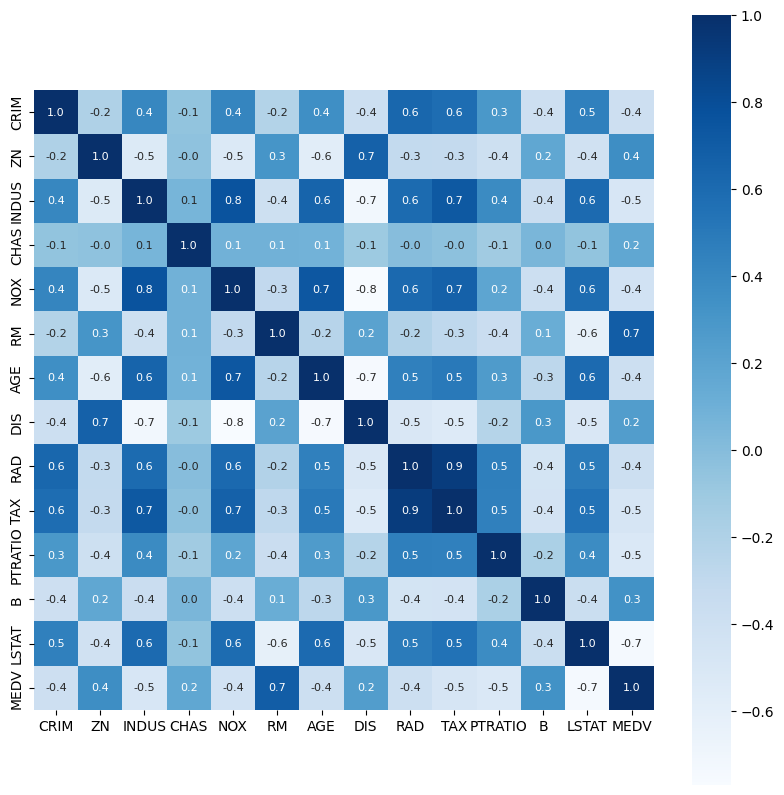

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [21]:
X = house_price_dataset.drop(['MEDV'], axis=1)
Y = house_price_dataset['MEDV']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [27]:
model = XGBRFRegressor()

In [29]:
model.fit(X_train, Y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [30]:
training_data_prediction = model.predict(X_train)

In [31]:
training_data_prediction

array([23.913973 , 21.274284 , 21.706085 , 33.891922 , 15.321652 ,
       14.574876 , 21.360111 , 14.970019 , 11.886114 , 21.203873 ,
       14.674246 ,  8.149292 , 28.327173 , 47.84187  , 33.07542  ,
       20.563257 , 21.444996 , 20.57949  , 32.45287  , 20.595598 ,
       24.31549  ,  9.214213 , 45.266132 , 21.023836 , 22.52694  ,
       20.501228 , 20.478928 , 24.996994 , 21.152206 , 32.164036 ,
       21.015936 ,  9.4465   , 19.706911 , 20.327833 , 12.401088 ,
        9.581582 , 12.281479 , 21.67828  , 19.333632 , 14.966582 ,
       23.92944  , 27.22909  , 14.759454 , 16.615194 , 15.650038 ,
       15.146117 , 25.957027 , 18.31739  , 49.098797 , 18.887568 ,
       21.06696  , 31.818817 , 16.672209 , 23.721725 , 20.486376 ,
       21.229282 , 21.232748 , 35.216446 , 30.84097  , 32.115513 ,
       21.779509 , 48.270164 , 14.640245 ,  7.957489 , 22.542604 ,
        9.551674 , 25.250402 , 18.568535 , 21.479717 , 46.303463 ,
       40.657913 , 34.232677 , 22.593138 , 33.670982 , 24.2422

In [32]:
# R squarred error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [33]:
score_1

0.9618693099140808

In [34]:
# Mean absolute error
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [35]:
mae

1.416955495116734

In [36]:
test_data_prediction = model.predict(X_test)

In [37]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

In [38]:
score_1

0.9228671498630973

In [39]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [40]:
mae

1.9658513639487463

Visualizing the actual price and predicted price

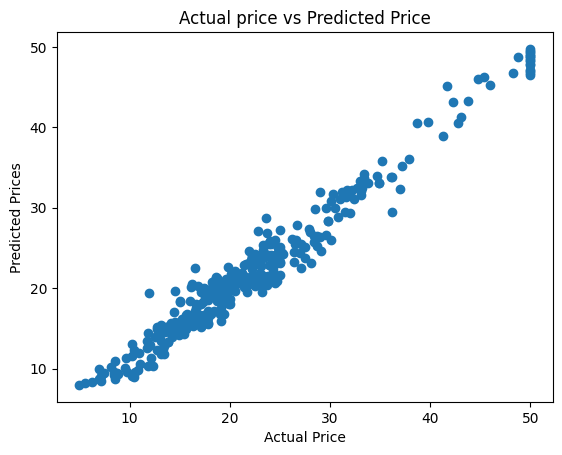

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price")
plt.show()